In [6]:
import sqlite3

In [14]:
import numpy as np
import pandas as pd
import sqlite3

conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
print("Connection Successful")
df = pd.read_sql("SELECT DISCOVERY_TIME, SOURCE_REPORTING_UNIT_NAME from Fires where SOURCE_REPORTING_UNIT_NAME = 'Plumas National Forest'",con=conn)
#df = pd.read_sql("SELECT DISTINCT SOURCE_REPORTING_UNIT_NAME from Fires",con=conn)

df.head(10)
# conn.close()


Connection Successful


,DISCOVERY_TIME,SOURCE_REPORTING_UNIT_NAME
0,1300,Plumas National Forest
1,1600,Plumas National Forest
2,1745,Plumas National Forest
3,1458,Plumas National Forest
4,1812,Plumas National Forest
5,0828,Plumas National Forest
6,1340,Plumas National Forest
7,1622,Plumas National Forest
8,1505,Plumas National Forest
9,1722,Plumas National Forest


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_FIRE_REPORT_ID        object 
 11  LOCAL_INCIDENT_ID           object 
 12  FIRE_CODE                   object 
 13  FIRE_NAME                   object 
 14  ICS_209_INCIDENT_NUMBER     object 
 15  ICS_209_NAME                object 
 16  MTBS_ID                     object 
 17  MTBS_FIRE_NAME              object 
 18  COMPLEX_NAME                object 
 19  FIRE_YEAR            

In [4]:
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
# Changing the data format for the above columns

### Code to check the missing values.

In [5]:
total= df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys = ['Total missing values', 'Percentage of missing values'])
missing_data

,Total missing values,Percentage of missing values
COMPLEX_NAME,1875282,0.997244
MTBS_ID,1869462,0.994149
MTBS_FIRE_NAME,1869462,0.994149
ICS_209_INCIDENT_NUMBER,1854748,0.986324
ICS_209_NAME,1854748,0.986324
FIRE_CODE,1555636,0.827261
LOCAL_FIRE_REPORT_ID,1459286,0.776024
CONT_TIME,972173,0.516985
FIRE_NAME,957189,0.509017
CONT_DOY,891531,0.474101


## SAMPLING TECHNIQUE 1:
Using Simple Sample method of Pandas DF. Taking 20% of the original data. (376093 entries)

In [6]:
fires_sample = df.sample(frac=2/10, random_state=10)
fires_sample.info()
# taking 20% of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376093 entries, 1466193 to 1076111
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   OBJECTID                    376093 non-null  int64         
 1   FOD_ID                      376093 non-null  int64         
 2   FPA_ID                      376093 non-null  object        
 3   SOURCE_SYSTEM_TYPE          376093 non-null  object        
 4   SOURCE_SYSTEM               376093 non-null  object        
 5   NWCG_REPORTING_AGENCY       376093 non-null  object        
 6   NWCG_REPORTING_UNIT_ID      376093 non-null  object        
 7   NWCG_REPORTING_UNIT_NAME    376093 non-null  object        
 8   SOURCE_REPORTING_UNIT       376093 non-null  object        
 9   SOURCE_REPORTING_UNIT_NAME  376093 non-null  object        
 10  LOCAL_FIRE_REPORT_ID        84369 non-null   object        
 11  LOCAL_INCIDENT_ID           2120

## SAMPLING TECHNIQUE 2:
Taking 15K samples from each year.

In [7]:
df1 = pd.read_sql("SELECT * FROM Fires WHERE FIRE_YEAR = 2015 LIMIT 15000",con=conn)

In [8]:
df1.shape

(15000, 39)

In [9]:
for i in range(1992,2014):
    Query1 = "SELECT * FROM Fires WHERE FIRE_YEAR = ? LIMIT 15000"
    df1 = df1.append(pd.read_sql(Query1, conn, params = [i]))

In [10]:
df1.shape

(345000, 39)

### Sampling data based on year(getting equal number of records per year)


In [11]:
new_df = df.groupby('FIRE_YEAR').apply(lambda x: x.sample(n=5000)).reset_index(drop = True)

In [12]:
new_df.size

4680000

In [13]:
uniq = df['FIRE_YEAR'].unique()
new_df['STAT_CAUSE_CODE'].value_counts()

5.0     27396
9.0     20325
7.0     17897
1.0     17777
13.0    10667
2.0      9455
4.0      5077
8.0      3946
3.0      3477
6.0      2191
11.0      883
10.0      677
12.0      232
Name: STAT_CAUSE_CODE, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ad4e9670>]],
      dtype=object)

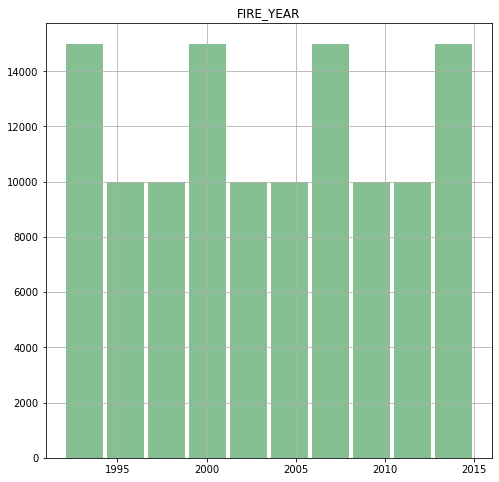

In [14]:
import matplotlib.pyplot as plt
new_df.hist(column="FIRE_YEAR", figsize=(8,8), color='#86bf91', rwidth=0.9)

### Sampling Technique 3 - Take 20% samples from each STAT_CAUSE_CODE and FIRE_YEAR group. Since we are predicting the cause, it is important to take enough samples from each cause. Since we are going to make analysis on the causes of wildfire over years, it is also important to take enough samples from all years

In [ ]:
df_by_cause_year = df.groupby(['STAT_CAUSE_CODE', 'FIRE_YEAR'])
df_by_cause_year.describe()

In [ ]:
df_by_cause_year = df.groupby(['STAT_CAUSE_CODE', 'FIRE_YEAR']).apply(lambda x: x.sample(frac=0.2)).reset_index(drop = True)
df_by_cause_year['STAT_CAUSE_CODE'].value_counts()

In [ ]:
df_by_cause_year['FIRE_YEAR'].value_counts()

### End of Sampling Technique 3

In [ ]:
#conn.close

In [ ]:
df['STAT_CAUSE_CODE'].value_counts()

In [20]:
df_grpby_cause = df.groupby('STAT_CAUSE_CODE').apply(lambda x: x.sample(n=3796)).reset_index(drop = True)
df_grpby_cause['STAT_CAUSE_CODE'].value_counts()

7.0     3796
13.0    3796
6.0     3796
10.0    3796
3.0     3796
11.0    3796
5.0     3796
9.0     3796
12.0    3796
8.0     3796
4.0     3796
2.0     3796
1.0     3796
Name: STAT_CAUSE_CODE, dtype: int64